# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib
import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1400)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1400)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_len=len(cities)
city_len
#cities

575

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units= "imperial"
i=1
j=1

name=[]
lat = []
temp = []
lng = []
max_temp =[]
humidity =[]
clouds =[]
wind = []
country =[]
date =[]


for city in cities:
    final_url= url +  "appid=" + api_key + "&q=" + city + "&units=" + units
    response= requests.get(final_url).json()
    
    try:
        city_name=response["name"]
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        print(f"processing record {i} of set{j} | {city_name}")  
        i+=1
        if i>50:
            j+=1
            i=1
    except:
        print("City not found. Skipping...")

      

processing record 1 of set1 | Barrow
processing record 2 of set1 | Mataura
processing record 3 of set1 | Puerto Ayora
processing record 4 of set1 | Hermanus
processing record 5 of set1 | Ribeira Grande
processing record 6 of set1 | Saint-Philippe
processing record 7 of set1 | Camacha
processing record 8 of set1 | Rikitea
processing record 9 of set1 | Avarua
processing record 10 of set1 | Tuatapere
processing record 11 of set1 | Punta Arenas
processing record 12 of set1 | Skeldon
processing record 13 of set1 | Dikson
processing record 14 of set1 | Ushuaia
processing record 15 of set1 | Tuktoyaktuk
processing record 16 of set1 | Vaini
processing record 17 of set1 | Mahebourg
processing record 18 of set1 | Adrar
processing record 19 of set1 | Bollnas
processing record 20 of set1 | Nabire
processing record 21 of set1 | Airai
processing record 22 of set1 | Andros Town
processing record 23 of set1 | Saquarema
processing record 24 of set1 | Butaritari
processing record 25 of set1 | Avera
proc

processing record 41 of set4 | Tshela
processing record 42 of set4 | Hambantota
processing record 43 of set4 | Jumla
City not found. Skipping...
processing record 44 of set4 | Tasiilaq
processing record 45 of set4 | Contamana
processing record 46 of set4 | Vila Velha
processing record 47 of set4 | Dunedin
City not found. Skipping...
processing record 48 of set4 | Biak
City not found. Skipping...
processing record 49 of set4 | Esperance
processing record 50 of set4 | Rosarito
processing record 1 of set5 | Shediac
processing record 2 of set5 | Tromso
processing record 3 of set5 | Dingle
processing record 4 of set5 | Jhang
processing record 5 of set5 | Burladingen
processing record 6 of set5 | Shingu
processing record 7 of set5 | San Patricio
processing record 8 of set5 | Tsabong
processing record 9 of set5 | Samarai
processing record 10 of set5 | Port Elizabeth
processing record 11 of set5 | Vestmannaeyjar
processing record 12 of set5 | Kruisfontein
processing record 13 of set5 | Antalah

processing record 34 of set8 | Hamilton
processing record 35 of set8 | Margate
processing record 36 of set8 | Kenora
processing record 37 of set8 | Jatai
processing record 38 of set8 | Pangnirtung
processing record 39 of set8 | Horsham
processing record 40 of set8 | Imeni Stepana Razina
processing record 41 of set8 | Jian
processing record 42 of set8 | Afsin
City not found. Skipping...
processing record 43 of set8 | Agadir
processing record 44 of set8 | Hami
processing record 45 of set8 | Sibolga
processing record 46 of set8 | Honningsvag
processing record 47 of set8 | Mahibadhoo
processing record 48 of set8 | Alta Floresta
City not found. Skipping...
processing record 49 of set8 | Bukama
processing record 50 of set8 | Sorong
City not found. Skipping...
processing record 1 of set9 | Itarema
processing record 2 of set9 | Rovnoye
processing record 3 of set9 | Anito
processing record 4 of set9 | Atar
processing record 5 of set9 | Sturgeon Falls
processing record 6 of set9 | Jequitinhonha


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:

city_data=pd.DataFrame({"City": name, 
                        "Cloudiness": clouds,
                        "Country": country,
                        "Date": date,
                        "Humidity": humidity,
                        "Lat": lat, 
                        "Lng": lng, 
                        "Max Temp": max_temp,
                        "Wind Speed": wind                        
                          })
city_data.head(20)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Barrow,0,AR,1536378768,81,-38.31,-60.23,41.58,5.73
1,Mataura,0,NZ,1536378768,74,-46.19,168.86,56.25,4.72
2,Puerto Ayora,32,EC,1536378769,100,-0.74,-90.35,71.19,12.44
3,Hermanus,92,ZA,1536378769,89,-34.42,19.24,48.51,6.17
4,Ribeira Grande,88,PT,1536378769,99,38.52,-28.70,74.25,4.50
5,Saint-Philippe,1,CA,1536376500,55,45.36,-73.48,62.60,5.82
6,Camacha,40,PT,1536377400,72,33.08,-16.33,68.00,9.17
7,Rikitea,92,PF,1536378705,100,-23.12,-134.97,71.55,29.10
8,Avarua,40,CK,1536375600,69,-21.21,-159.78,77.00,5.82
9,Tuatapere,8,NZ,1536378771,92,-46.13,167.69,51.30,4.72


In [12]:
city_data.to_csv("../city_data.csv")


In [13]:
city_data.count()

City          520
Cloudiness    520
Country       520
Date          520
Humidity      520
Lat           520
Lng           520
Max Temp      520
Wind Speed    520
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

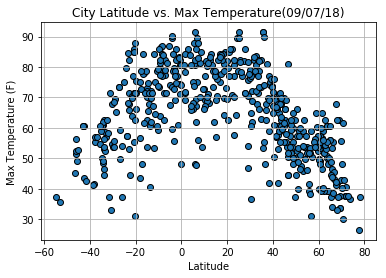

In [14]:
plt.scatter(city_data["Lat"], city_data["Max Temp"], marker="o" , edgecolors="black")


plt.title("City Latitude vs. Max Temperature(09/07/18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("lat_max.png")


plt.show()

#### Latitude vs. Humidity Plot

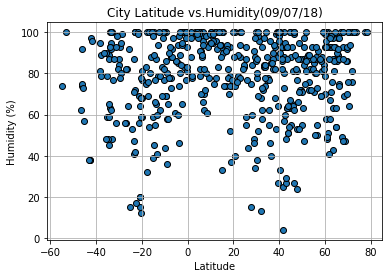

In [15]:
plt.scatter(city_data["Lat"], city_data["Humidity"], marker="o" , edgecolors="black")


plt.title("City Latitude vs.Humidity(09/07/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("lat_hum.png")


plt.show()

#### Latitude vs. Cloudiness Plot

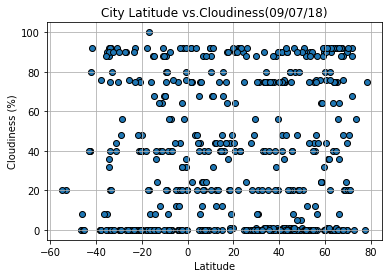

In [16]:
plt.scatter(city_data["Lat"], city_data["Cloudiness"], marker="o" , edgecolors="black")


plt.title("City Latitude vs.Cloudiness(09/07/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("lat_clo.png")


plt.show()

#### Latitude vs. Wind Speed Plot

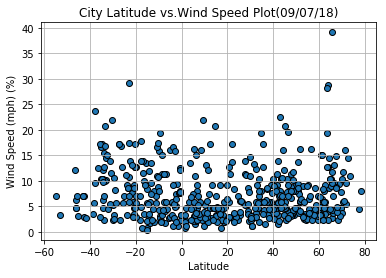

In [18]:
plt.scatter(city_data["Lat"], city_data["Wind Speed"], marker="o" , edgecolors="black")


plt.title("City Latitude vs.Wind Speed Plot(09/07/18)")
plt.ylabel("Wind Speed (mph) (%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("lat_windspeed.png")


plt.show()